<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468 entries, 0 to 3467
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3468 non-null   int64  
 1   tweet                3467 non-null   object 
 2   sarcastic            3468 non-null   int64  
 3   rephrase             867 non-null    object 
 4   sarcasm              867 non-null    float64
 5   irony                867 non-null    float64
 6   satire               867 non-null    float64
 7   understatement       867 non-null    float64
 8   overstatement        867 non-null    float64
 9   rhetorical_question  867 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 271.1+ KB


None

,Unnamed: 0,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0
1,1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0
2,2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0
3,3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0
4,4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,1.0,0.0,0.0,0.0,0.0,0.0


,Unnamed: 0,sarcastic,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
count,3468.000000,3468.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000
mean,1733.500000,0.250000,0.822376,0.178777,0.028835,0.011534,0.046136,0.116494
std,1001.269694,0.433075,0.382417,0.383387,0.167439,0.106837,0.209901,0.321001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,866.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1733.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2600.250000,0.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3467.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


sarcastic
0    2601
1     867
Name: count, dtype: int64

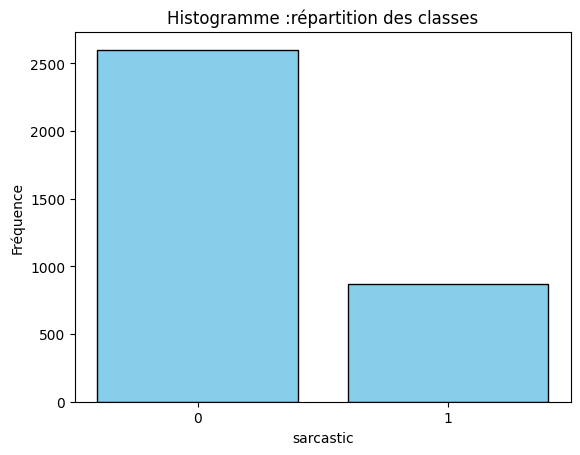

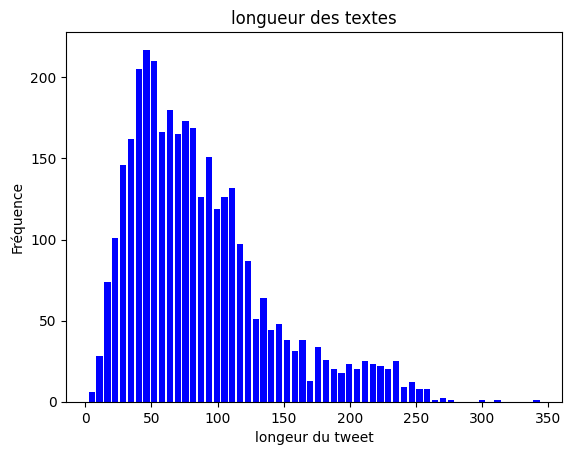

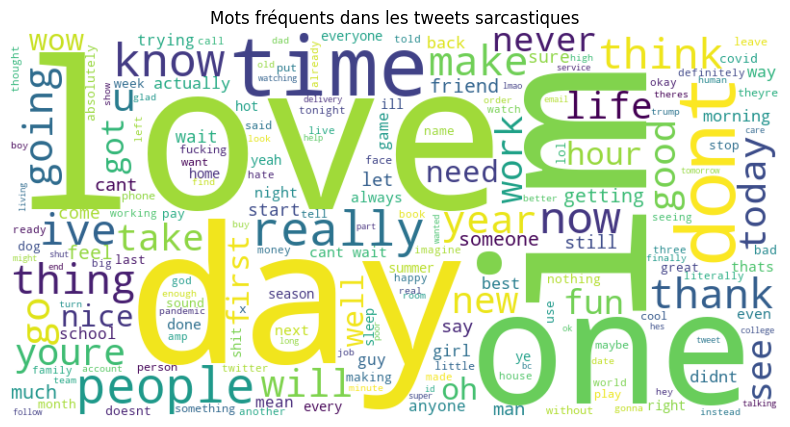

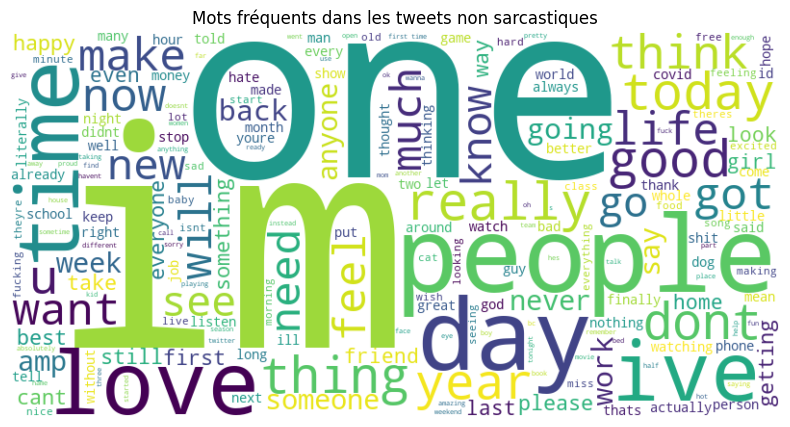

In [39]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
from wordcloud import WordCloud


df = pd.read_csv("train.En.csv") #chargement du fichier : train.En.csv
#analys
display(df.info())
display(df.head())
display(df.describe())

#verification du distribution des classes
display(df["sarcastic"].value_counts())

#Mesure la longueur des textes 
df["num_words"] = df["tweet"].str.split().str.len()
df["len_tweet"] = df["tweet"].str.replace(" ","").str.len()

#visualisation des donnéés

plt.hist(df["sarcastic"], bins=[-0.5, 0.5, 1.5], color='skyblue', edgecolor='black', rwidth=0.8)
plt.xticks([0,1])  # pour afficher seulement 0 et 1 sur l'axe x
plt.title("Histogramme :répartition des classes")
plt.xlabel("sarcastic")
plt.ylabel("Fréquence")
plt.show()


plt.hist(df["len_tweet"], bins=int(np.sqrt(len(df["len_tweet"]))), color='blue', rwidth=0.8 )
plt.title("longueur des textes")
plt.xlabel("longeur du tweet")
plt.ylabel("Fréquence")
plt.show()

def clean_tweet(text):
    text = text.lower()                                  # mettre tout le texte en minuscules
    text = re.sub(r'http\S+|www\S+', '', text)           # supprimer les liens (URLs)
    text = re.sub(r'@\w+', '', text)                     # supprimer les mentions (@utilisateur)
    text = re.sub(r'#', '', text)                        # supprimer le symbole # mais garder le mot
    text = re.sub(r'[^a-z\s]', '', text)                 # supprimer la ponctuation, les chiffres et les emojis
    text = re.sub(r'\s+', ' ', text).strip()             # supprimer les espaces multiples et les espaces en trop
    return text


text_sarcastic = " ".join(df[df["sarcastic"] == 1]["tweet"].astype(str).tolist()) #mettre tout les tweets sarcastic dans la meme str
cleaned_tweet_sarcastic = clean_tweet(text_sarcastic)#nettoyage et transformation du text 

text_non_sarcastic = " ".join(df[df["sarcastic"] == 0]["tweet"].astype(str).tolist()) #mettre tout les tweets sarcastic dans la meme str
cleaned_tweet_non_sarcastic = clean_tweet(text_non_sarcastic)#nettoyage et transformation du text 

wordcloud_sarcastic = WordCloud(width=800, height=400, background_color='white').generate(cleaned_tweet_sarcastic)
wordcloud_non_sarcastic = WordCloud(width=800, height=400, background_color='white').generate(cleaned_tweet_non_sarcastic)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_sarcastic, interpolation='bilinear')
plt.axis('off')  
plt.title("Mots fréquents dans les tweets sarcastiques")

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_sarcastic, interpolation='bilinear')
plt.axis('off')  
plt.title("Mots fréquents dans les tweets non sarcastiques")

plt.show()

